# Test Loading data and basic pre processing

In [1]:
import torch

import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt

from os.path import join

import sys
sys.path.append('../')
import utils

## Load Data from h5 file

In [2]:
file_path = join('/home/squirt/Documents/data/weather_data/', 'all_data.h5')

In [3]:
def normalize_tensor(data):
    # Compute mean and std along the batch_size, x1, and x2 dimensions
    mean = data.mean(dim=(0, 3, 4), keepdim=True)
    std = data.std(dim=(0, 3, 4), keepdim=True)
    
    # Normalize the data
    normalized_data = (data - mean) / (std + 1e-7)  # Add a small constant to avoid division by zero
    
    return normalized_data, mean, std

In [4]:
h5_data = utils.load_hdf5(file_path)
l, x, y = utils.generate_stacks(h5_data)

In [5]:
xn = normalize_tensor(x)
yn = normalize_tensor(y)

In [6]:
l.shape

torch.Size([19200, 3, 2, 2])

## Plot

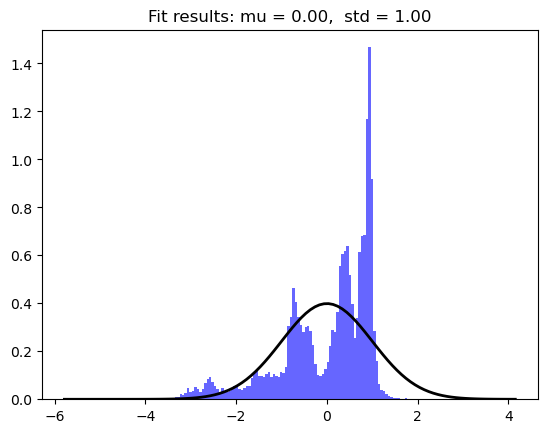

In [7]:
x_cell_1 = x[:,0,0,:]  # Extract the first cell of the first sample
x_cell_1, _ = torch.sort(x_cell_1.flatten())

def plot_tensor(t):
    #plt.plot(t.numpy())
    #plt.show()
    plt.hist(t.numpy(), bins=100, density=True, alpha=0.6, color='b')
    xmin, xmax = plt.xlim()
    x_lin = np.linspace(xmin-2, xmax+2, 100)
    p = stats.norm.pdf(x_lin, np.mean(t.numpy()), np.std(t.numpy()))
    plt.plot(x_lin, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (np.mean(t.numpy()), np.std(t.numpy()))
    plt.title(title)
    plt.show()

plot_tensor(x_cell_1)